# MACHINE LEARNING ASSIGNMENT GROUP 5

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('model.csv')


In [2]:
df.head(3)


,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0


In [3]:
df.isnull().sum()

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [4]:
set(df.Vehicle_Age)

{'1-2 Year', '< 1 Year', '> 2 Years'}

In [5]:
#primary cleaning
df=df.drop(columns=['id'])

#replace Yes/No with 1/0
for i in range(len(df.columns)):
    if 'Yes' in set(df.iloc[:,i]):
        df.iloc[:,i]=df.iloc[:,i].map({'Yes': 1, 'No': 0})

#replce NAs in L_T
df['Licence_Type'] = df['Licence_Type'].fillna('No_Licence')

#transform Vehicle age to ordinal 
df.Vehicle_Age=df.Vehicle_Age.map({'1-2 Year':2, '< 1 Year':1, '> 2 Years':3})


## Split categorical/continuous variables

In [6]:
df.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured       int64
Vehicle_Age              int64
Vehicle_Damage           int64
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [7]:
df.head(3)

,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,Female,44,1,M,30,0,2,1,25741,154,152,0
1,Male,23,1,M,3,1,1,0,2630,152,256,0
2,Male,43,1,C,28,0,2,1,70720,52,224,0


In [8]:
df_categorical=pd.concat([df.select_dtypes(include=['object']),df[['Region_Code',
                                                                   'Policy_Sales_Channel',
                                                                    'Driving_License',
                                                                   'Vehicle_Damage',
                                                                'Previously_Insured']],df.Target],axis=1)
            
df_categorical.head()

,Gender,Licence_Type,Region_Code,Policy_Sales_Channel,Driving_License,Vehicle_Damage,Previously_Insured,Target
0,Female,M,30,154,1,1,0,0
1,Male,M,3,152,1,0,1,0
2,Male,C,28,52,1,1,0,0
3,Male,B,28,26,1,0,1,0
4,Female,B,46,124,1,1,0,0


In [9]:
df_numerical=df.select_dtypes(include=['int64','float64']).drop(['Region_Code',
                                                                'Policy_Sales_Channel',
                                                                'Driving_License',
                                                                'Previously_Insured',
                                                                 'Vehicle_Damage'],axis=1)
df_numerical.head()

,Age,Vehicle_Age,Annual_Premium,Seniority,Target
0,44,2,25741,152,0
1,23,1,2630,256,0
2,43,2,70720,224,0
3,60,2,48512,86,0
4,42,2,32169,132,0


In [10]:
df_numerical.columns


Index(['Age', 'Vehicle_Age', 'Annual_Premium', 'Seniority', 'Target'], dtype='object')

## Categorical data

In [11]:
df_categorical.shape

(102351, 8)

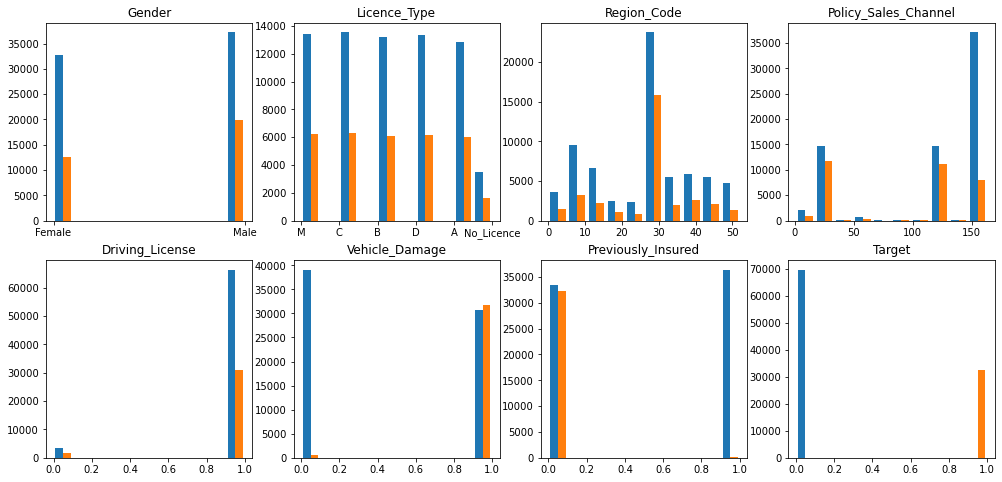

In [12]:
#frequencies
df_0=df_categorical[df['Target']==0] # records wih target==1
df_1=df_categorical[df['Target']==1] # records wih target==0


fig, axes = plt.subplots(2,4,figsize=[17,8])
axes = axes.flatten()
i=0
for x in df_categorical.columns[:len(df_categorical.columns)]:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=False)
    plt.title(x)
    i+=1
plt.show()


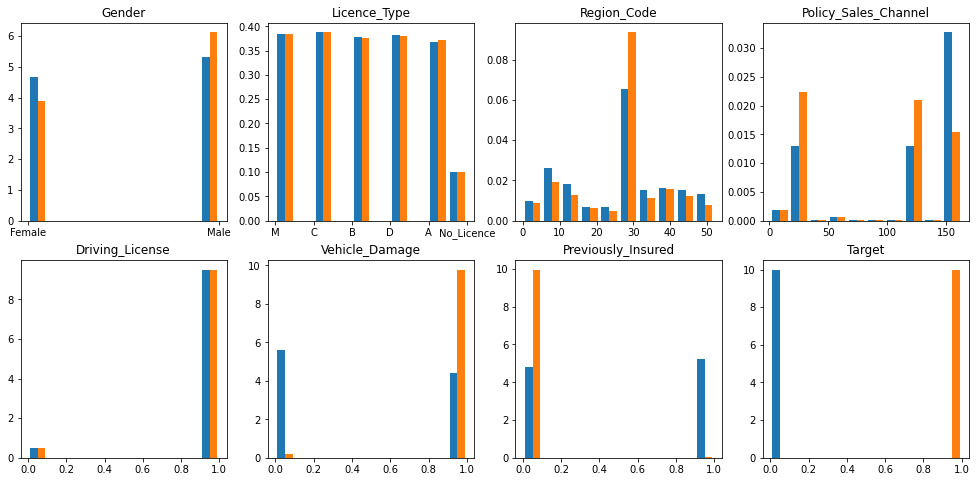

In [13]:
df_0=df_categorical[df['Target']==0] # records wih target==1
df_1=df_categorical[df['Target']==1] # records wih target==0


fig, axes = plt.subplots(2,4,figsize=[17,8])
axes = axes.flatten()
i=0
for x in df_categorical.columns[:len(df_categorical.columns)]:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [14]:
df_categorical.columns

Index(['Gender', 'Licence_Type', 'Region_Code', 'Policy_Sales_Channel',
       'Driving_License', 'Vehicle_Damage', 'Previously_Insured', 'Target'],
      dtype='object')

In [15]:
#find 3 most importnant categories in Sales Channels
P=df['Policy_Sales_Channel'].value_counts()[:3].index.tolist()
#find 2 most importnant categories in Regions 
R=df['Region_Code'].value_counts()[:2].index.tolist()

#leave only them in final table and create a filler category
first=list(set(df['Policy_Sales_Channel']).difference(P))
for i in range(0,len(first)):
    df_categorical.Policy_Sales_Channel = df_categorical.Policy_Sales_Channel.replace(first[i],'Others')  
first=list(set(df['Region_Code']).difference(R))
for i in range(0,len(first)):
    df_categorical.Region_Code = df_categorical.Region_Code.replace(first[i],'Others')
 

In [16]:
df_categorical.head()

,Gender,Licence_Type,Region_Code,Policy_Sales_Channel,Driving_License,Vehicle_Damage,Previously_Insured,Target
0,Female,M,Others,Others,1,1,0,0
1,Male,M,Others,152,1,0,1,0
2,Male,C,28,Others,1,1,0,0
3,Male,B,28,26,1,0,1,0
4,Female,B,Others,124,1,1,0,0


In [17]:
#check if its correct
set(df_categorical.Policy_Sales_Channel)

{124, 152, 26, 'Others'}

In [18]:
#check if its correct
set(df_categorical.Region_Code)

{28, 8, 'Others'}

In [19]:
#not include licence type, Driving Licence! (and target)

dummies = pd.get_dummies(df_categorical[['Region_Code','Policy_Sales_Channel','Gender',
                                                'Vehicle_Damage','Previously_Insured']],drop_first=False)\
            .drop(columns=['Gender_Female','Policy_Sales_Channel_Others',
                           'Region_Code_Others'])

dummies.tail()

,Vehicle_Damage,Previously_Insured,Region_Code_8,Region_Code_28,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Gender_Male
102346,0,1,0,0,0,0,1,0
102347,1,0,0,1,1,0,0,0
102348,1,0,1,0,0,1,0,1
102349,0,1,0,0,0,0,1,0
102350,1,0,0,1,0,0,0,1


## Numerical data

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Vehicle_Age'}>],
       [<AxesSubplot:title={'center':'Annual_Premium'}>,
        <AxesSubplot:title={'center':'Seniority'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

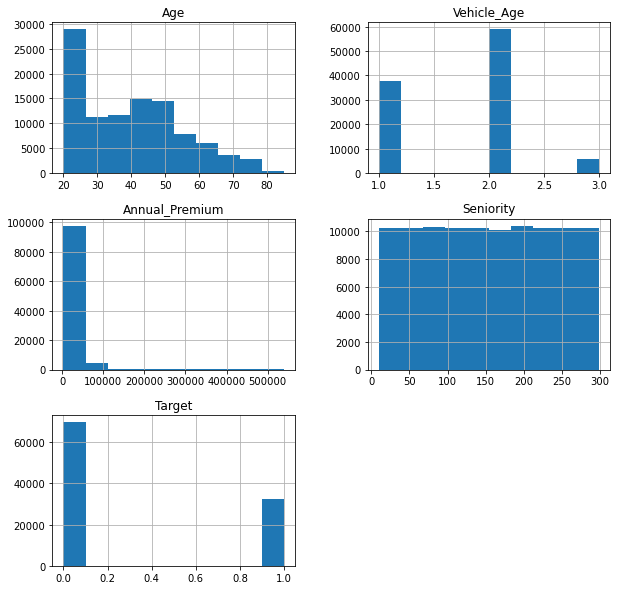

In [20]:
df_numerical.hist(figsize=(10,10),density=False)

In [21]:
#logistic transformation of Annual premium

import math
pd.options.mode.chained_assignment = None

df_numerical['Annual_Premium']=df_numerical['Annual_Premium'].apply(lambda x: math.log(x+1))


In [22]:
df_numerical.head(3)

,Age,Vehicle_Age,Annual_Premium,Seniority,Target
0,44,2,10.155879,152,0
1,23,1,7.875119,256,0
2,43,2,11.166498,224,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Vehicle_Age'}>],
       [<AxesSubplot:title={'center':'Annual_Premium'}>,
        <AxesSubplot:title={'center':'Seniority'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

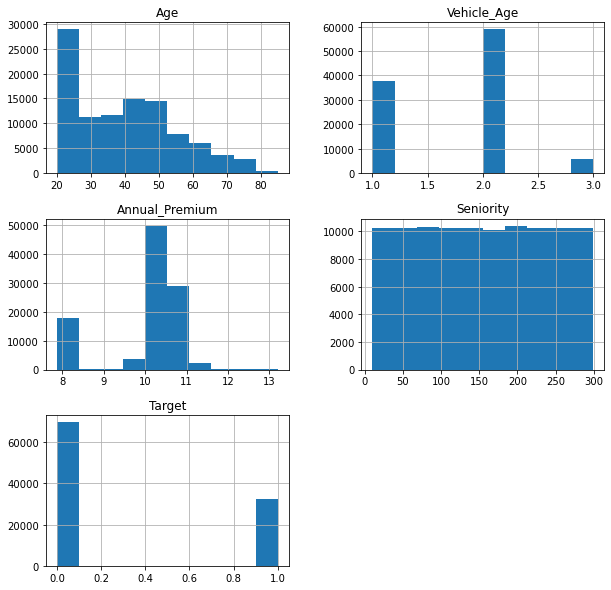

In [23]:
df_numerical.hist(figsize=(10,10))

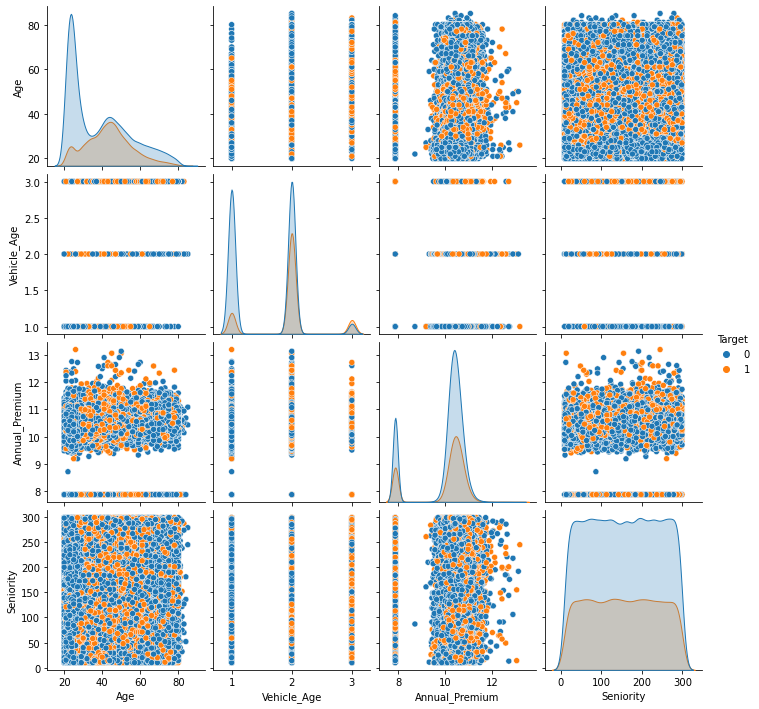

In [24]:
sns.pairplot(df_numerical, hue='Target')

In [25]:
#we remove seniority!
df_numerical=df_numerical.drop(columns='Seniority')

In [26]:
#final dataframe!
df=pd.concat([dummies,df_numerical],axis=1)
df.head()

#df.to_csv(r'Desktop/Final.csv', index = False)

,Vehicle_Damage,Previously_Insured,Region_Code_8,Region_Code_28,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Gender_Male,Age,Vehicle_Age,Annual_Premium,Target
0,1,0,0,0,0,0,0,0,44,2,10.155879,0
1,0,1,0,0,0,0,1,1,23,1,7.875119,0
2,1,0,0,1,0,0,0,1,43,2,11.166498,0
3,0,1,0,1,1,0,0,1,60,2,10.789587,0
4,1,0,0,0,0,1,0,0,42,2,10.378790,0


## Standarize

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df[['Age','Vehicle_Age','Annual_Premium']])
scaled_df = pd.DataFrame(scaler.transform(df[['Age','Vehicle_Age','Annual_Premium']]))
scaled_df.columns = df[['Age','Vehicle_Age','Annual_Premium']].columns

scaled_df.head()

,Age,Vehicle_Age,Annual_Premium
0,0.276696,0.552550,0.139553
1,-1.129329,-1.200194,-2.106606
2,0.209743,0.552550,1.134839
3,1.347954,0.552550,0.763646
4,0.142789,0.552550,0.359081


<AxesSubplot:>

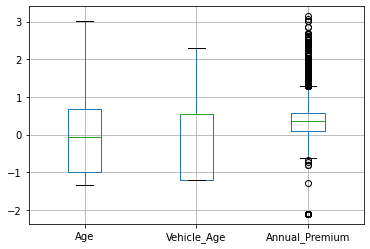

In [28]:
scaled_df.boxplot()

In [29]:
scaled_df.tail()

,Age,Vehicle_Age,Annual_Premium
102346,-0.995422,-1.200194,0.433524
102347,0.477557,0.552550,0.308679
102348,2.151397,2.305293,0.847880
102349,-0.995422,-1.200194,0.162318
102350,2.017490,0.552550,-2.106606


In [30]:
X_numerical=scaled_df

In [31]:
dummies.tail(3)

,Vehicle_Damage,Previously_Insured,Region_Code_8,Region_Code_28,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Gender_Male
102348,1,0,1,0,0,1,0,1
102349,0,1,0,0,0,0,1,0
102350,1,0,0,1,0,0,0,1


In [32]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(102351, 8)
(102351, 3)


,Vehicle_Damage,Previously_Insured,Region_Code_8,Region_Code_28,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Gender_Male
102346,0,1,0,0,0,0,1,0
102347,1,0,0,1,1,0,0,0
102348,1,0,1,0,0,1,0,1
102349,0,1,0,0,0,0,1,0
102350,1,0,0,1,0,0,0,1


In [33]:
X=pd.concat([dummies,X_numerical], axis = 1)

X.tail()

,Vehicle_Damage,Previously_Insured,Region_Code_8,Region_Code_28,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Gender_Male,Age,Vehicle_Age,Annual_Premium
102346,0,1,0,0,0,0,1,0,-0.995422,-1.200194,0.433524
102347,1,0,0,1,1,0,0,0,0.477557,0.552550,0.308679
102348,1,0,1,0,0,1,0,1,2.151397,2.305293,0.847880
102349,0,1,0,0,0,0,1,0,-0.995422,-1.200194,0.162318
102350,1,0,0,1,0,0,0,1,2.017490,0.552550,-2.106606


### Separate Train/Test sets


In [34]:
y=df['Target']

In [35]:
y.shape

(102351,)

In [36]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(71645, 11) (30706, 11)


## Models

### Multi-layer Perceptron classifier

In [37]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()

#I tried (2,1), (3,2), (5,2), (5,3,2), (6,3), (8,4), (10,5), (20,10) layers
#Top: (6,3) con alpha=0.1
parameters = {"hidden_layer_sizes":[(6,3), (5,2), (5,3,2),(10,5)],  "max_iter": [5000], "alpha": [1,0.1]}

#DEFINE GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)
#TRAIN CLASSIFIER
gs = gs.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:   29.8s remaining:   41.8s
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:   30.1s remaining:   35.6s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:   31.1s remaining:   31.1s
[Parallel(n_jobs=-1)]: Done  13 out of  24 | elapsed:   35.3s r

In [38]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))

Best score: 0.667299 using {'alpha': 0.1, 'hidden_layer_sizes': (6, 3), 'max_iter': 5000}


In [39]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

from sklearn import metrics
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6796853810686194
--
***RESULTS ON TEST SET***
f1_score:  0.6741267612014679


In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[16073  4891]
 [ 2302  7440]]


<AxesSubplot:>

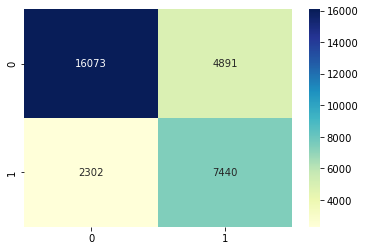

In [41]:
##### Confusion heat matrix
import seaborn as sn
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True
           , cmap = "YlGnBu" ,fmt = 'g')


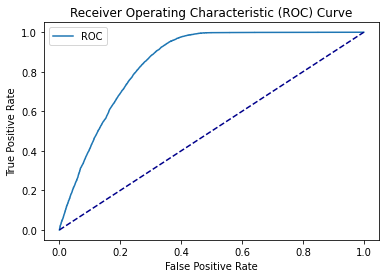

In [42]:
#predict_proba gives the probabilities for the target (0 and 1 in your case) 
y_probs = best_model.predict_proba(X_test) 
fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

#plot ROC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [43]:
#show area under the curve
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

AUC: 0.85


## DECISION TREE

In [44]:
#In order to find the optimal hyper parameters, using GRIDSEARCHCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,5,10, 50],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2,4]}

In [45]:
#Defining the grid search
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [46]:
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  91 out of  96 | elapsed:    3.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    3.6s finished


In [47]:
#Results of Grid Search
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.692146 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.692146 (0.001834) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.692146 (0.001834) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.692146 (0.001834) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.692146 (0.001834) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.674461 (0.006906) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.674461 (0.006906) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.674461 (0.006906) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.674461 (0.006906) with: {'criterion': 'entropy', 'max_dep

In [48]:
#Testing the test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [49]:
#printing the classification report 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.68      0.79     20964
           1       0.56      0.88      0.69      9742

    accuracy                           0.75     30706
   macro avg       0.75      0.78      0.74     30706
weighted avg       0.81      0.75      0.76     30706



In [50]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

from sklearn import metrics
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6921470628508831
--
***RESULTS ON TEST SET***
f1_score:  0.6888888888888889


In [51]:
#Checking the confusion matrix 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14304  6660]
 [ 1124  8618]]


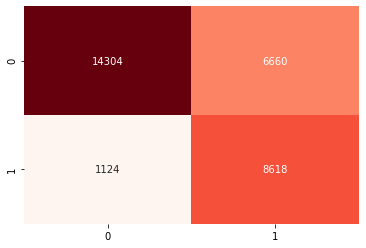

In [52]:
# Plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);


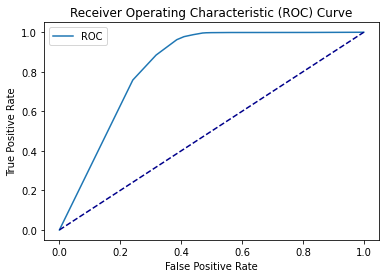

AUC: 0.83


In [53]:
#Checking the ROC Curive
from sklearn import metrics
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, min_samples_split=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test) 
fpr1, tpr1, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

# Random Forest 


In [54]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)
#rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_prediction_train=rand_forest.predict(X_train)

y_pred = rand_forest.predict(X_test)

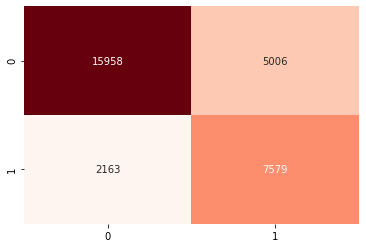

In [55]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);




In [56]:
#TEST ON YOUR TEST SET 

from sklearn import metrics
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_prediction_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6839290848107331
--
***RESULTS ON TEST SET***
f1_score:  0.6789089443274958


In [57]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.76      0.82     20964
           1       0.60      0.78      0.68      9742

    accuracy                           0.77     30706
   macro avg       0.74      0.77      0.75     30706
weighted avg       0.79      0.77      0.77     30706



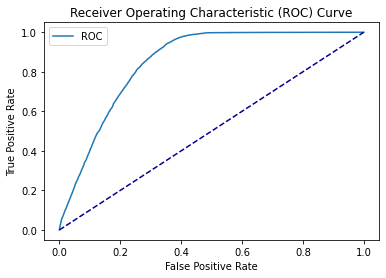

AUC: 0.85


In [58]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr2, tpr2, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr2, tpr2, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Logistic Regression 

In [59]:
# separating our independent and dependent variable
# now I have two datasets to work with 

X = df.drop(['Target'], axis = 1)
y = df['Target']

In [60]:
from sklearn.model_selection import train_test_split

# random state number is 45
# This takes a sample at random. So I splitted the dataset into 80:20 (80 % training and 20% test).
# To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
# Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45) 



In [61]:
# Checking the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81880, 11)
(20471, 11)
(81880,)
(20471,)


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

#Step1: Make an instance of the model(using the default parameters)-> not sure if I need this
logreg = LogisticRegression(random_state = 20)

#Step2: train the model on the data and store the information learned from the data
#The model is learning the relationship between x and y 
logreg.fit(X_train,y_train)

# predicting the outcome 
y_pred = logreg.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# Accuracy on the train dataset
print("The accuracy of the train dataset:", logreg.score(X_train, y_train))
print("The accuracy of the test dataset:", logreg.score(X_test, y_test))

The accuracy of the train dataset: 0.7522594040058622
The accuracy of the test dataset: 0.7509647794440917


In [64]:
# Confusion Matrix for test dataset
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10531,  3392],
       [ 1706,  4842]], dtype=int64)

Text(0.5, 257.44, 'Predicted Outcome')

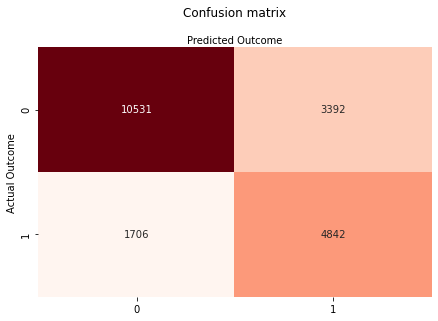

In [65]:
# Visaulising the Confusion Matrix

class_names = [0,1] # name of classes in target variable
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap



# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')





In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.7509647794440917
Precision: 0.5880495506436726
Recall: 0.7394624312767257


In [67]:
precision = 0.5894503873109553
recall = 0.7321319486866219
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

0.6530890266330632


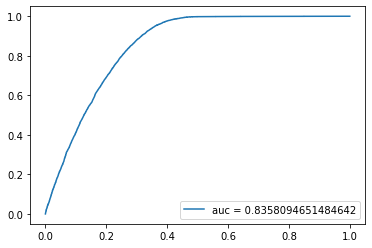

In [68]:
#ROC Curve 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label = "auc = "+str(auc))
plt.legend(loc = 4)
plt.show()

# Comapring the ROC of all the Models

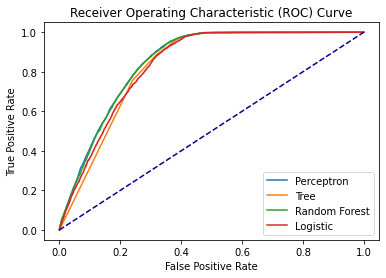

In [69]:
plt.plot(fpr, tpr, label= "Perceptron")
plt.plot(fpr1, tpr1, label= "Tree")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "Logistic")    

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
